### see

http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut5.html

In [46]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


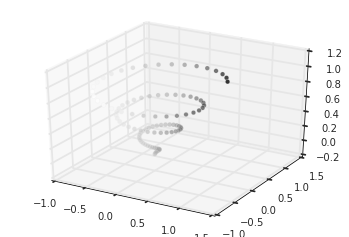

In [47]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

c = x + y

ax.scatter(x, y, z, c=c)

### OK - now import the data

In [48]:
import sys
from collections import namedtuple

import numpy as np

%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

import lmfit

from joblib import Parallel, delayed  
import multiprocessing

np.random.seed(666)

import pandas as pd
class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

In [4]:
import cPickle as pickle
import gzip
(results, results2, results3) = pickle.load( gzip.GzipFile( "results.p.gz", "rb" ) )

(-0.1, 2.0)

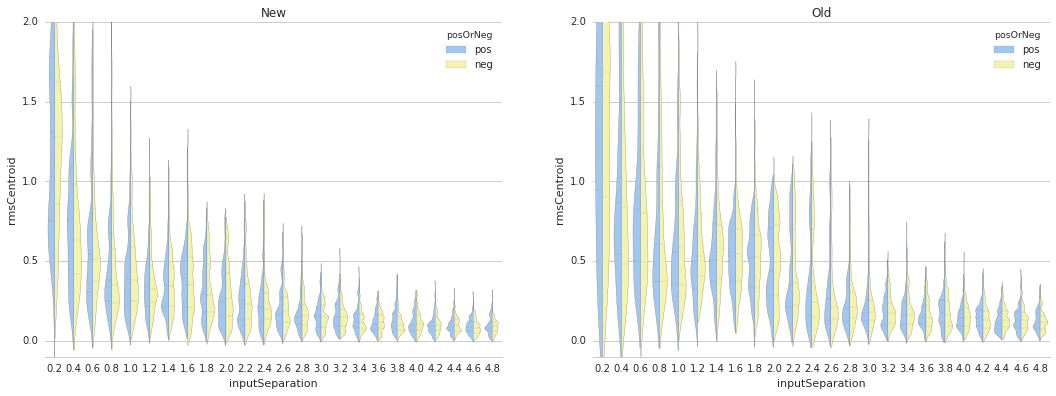

In [8]:
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

df1 = pd.DataFrame([res['new'] for res in results2])
df2 = df1.copy()
df1['rmsCentroid'] = np.sqrt((df1.inputPosCentroidX - df1.psfFitPosCentroidX)**2. + \
                               (df1.inputPosCentroidY - df1.psfFitPosCentroidY)**2.)   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df2['rmsCentroid'] = np.sqrt((df2.inputNegCentroidX - df2.psfFitNegCentroidX)**2. + \
                               (df2.inputNegCentroidY - df2.psfFitNegCentroidY)**2.)   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
sns.violinplot(x="inputSeparation", y="rmsCentroid", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.3, bw=0.2, ax=axes[0])
sns.despine(left=True)

df1 = pd.DataFrame([res['old'] for res in results2])
df2 = df1.copy()
df1['rmsCentroid'] = np.sqrt((df1.inputPosCentroidX - df1.psfFitPosCentroidX)**2. + \
                               (df1.inputPosCentroidY - df1.psfFitPosCentroidY)**2.)   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df2['rmsCentroid'] = np.sqrt((df2.inputNegCentroidX - df2.psfFitNegCentroidX)**2. + \
                               (df2.inputNegCentroidY - df2.psfFitNegCentroidY)**2.)   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
sns.violinplot(x="inputSeparation", y="rmsCentroid", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.3, bw=0.2, ax=axes[1])
sns.despine(left=True)

axes[0].set_title('New')
axes[0].set_ylim([-0.1,2.0])
axes[1].set_title('Old')
axes[1].set_ylim([-0.1,2.0])

(-1000, 15000)

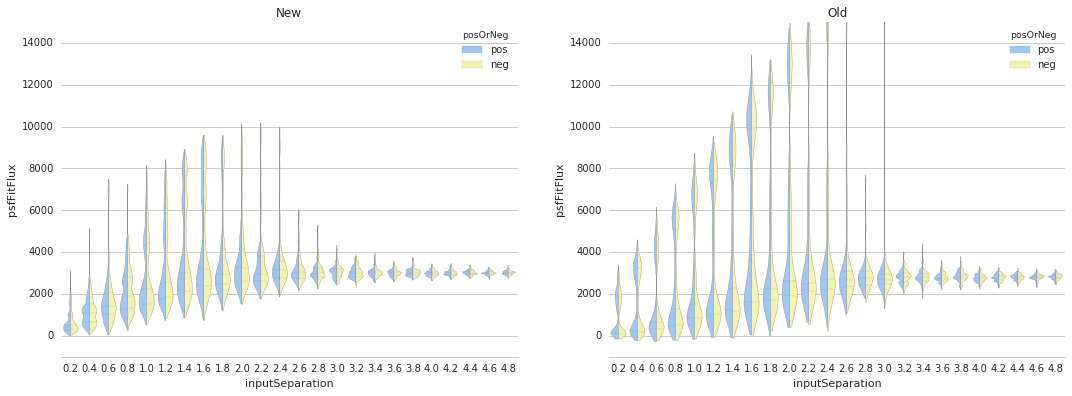

In [9]:
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

df1 = pd.DataFrame([res['new'] for res in results2])
df2 = df1.copy()
df1['psfFitFlux'] = df1.psfFitPosFlux   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df2['psfFitFlux'] = -df2.psfFitNegFlux   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
sns.violinplot(x="inputSeparation", y="psfFitFlux", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.3, bw=0.2, ax=axes[0])
sns.despine(left=True)

df1 = pd.DataFrame([res['old'] for res in results2])
df2 = df1.copy()
df1['psfFitFlux'] = df1.psfFitPosFlux   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df1.loc[(df1.psfFitFlux > 30000.), 'psfFitFlux'] = 30000.
df2['psfFitFlux'] = -df2.psfFitNegFlux   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
df2.loc[(df2.psfFitFlux > 30000.), 'psfFitFlux'] = 30000.
sns.violinplot(x="inputSeparation", y="psfFitFlux", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.3, bw=0.2, ax=axes[1])
sns.despine(left=True)

axes[0].set_title('New')
axes[0].set_ylim([-1000,15000])
axes[1].set_title('Old')
axes[1].set_ylim([-1000,15000])

In [71]:
df1 = pd.DataFrame([res['old'] for res in results2])
df2 = df1.copy()
df1['rmsCentroid'] = np.sqrt((df1.inputPosCentroidX - df1.psfFitPosCentroidX)**2. + \
                               (df1.inputPosCentroidY - df1.psfFitPosCentroidY)**2.)   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df2['rmsCentroid'] = np.sqrt((df2.inputNegCentroidX - df2.psfFitNegCentroidX)**2. + \
                               (df2.inputNegCentroidY - df2.psfFitNegCentroidY)**2.)   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])

df1['psfFitFlux'] = df1.psfFitPosFlux   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df2['psfFitFlux'] = -df2.psfFitNegFlux   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])

df1 = df1.append(df2)
sizeme(df1.head())

,inputCentroidX,inputCentroidY,inputFlux,inputNegCentroidX,inputNegCentroidY,inputPosCentroidX,inputPosCentroidY,inputRotation,inputSeparation,psfFitCentroidX,...,psfFitNegCentroidY,psfFitNegFlux,psfFitOrientation,psfFitPosCentroidX,psfFitPosCentroidY,psfFitPosFlux,psfFitSignaltoNoise,rmsCentroid,posOrNeg,psfFitFlux
0,25,25,3000,24.9,25,25.1,25,0,0.2,24.844614,...,26.424589,-125.214006,1.81226 rad,26.718960,25.501415,124.985689,3.766181,1.694830,pos,124.985689
1,25,25,3000,24.8,25,25.2,25,0,0.4,25.097946,...,25.591207,-330.699487,1.69051 rad,26.467858,25.261647,265.630337,3.928798,1.294574,pos,265.630337
2,25,25,3000,24.7,25,25.3,25,0,0.6,25.457513,...,24.863540,-875.611734,1.54719 rad,25.967760,24.887638,889.113560,2.377899,0.677147,pos,889.113560
3,25,25,3000,24.6,25,25.4,25,0,0.8,25.223582,...,24.973452,-5261.282205,1.71862 rad,25.348629,24.936212,5275.654714,14.963858,0.081902,pos,5275.654714
4,25,25,3000,24.5,25,25.5,25,0,1.0,25.234006,...,24.482504,-630.243844,1.47042 rad,26.599732,24.757611,659.679618,6.560571,1.126128,pos,659.679618


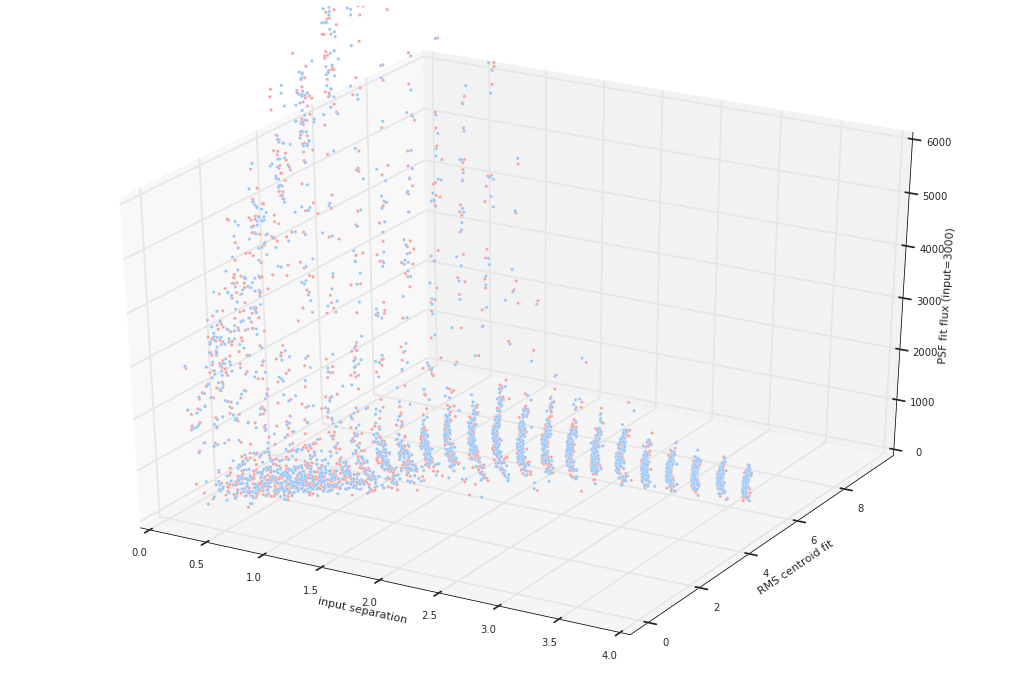

In [72]:
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)

def plot_3d(elev=30, azim=-60):   ## this is apparently the default
    x = df1.inputSeparation
    y = df1.rmsCentroid
    z = df1.psfFitFlux
    c = ['r' if i == 'pos' else 'b' for i in df1.posOrNeg]

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    #c = x + y
    #print x.min(), x.max()

    ax.scatter(x, y, z, c=c, s=10, depthshade=False)
    ax.view_init(elev=elev, azim=azim)
    #print ax.elev, ax.azim
    ax.autoscale_view(tight=True)
    ax.set_xlabel('input separation')
    ax.set_ylabel('RMS centroid fit')
    ax.set_zlabel('PSF fit flux (input=3000)')
    ax.set_xlim([0, 4])
    ax.set_zlim([0, 6000])
    plt.draw()
    #return fig

plot = plot_3d(30, -60)

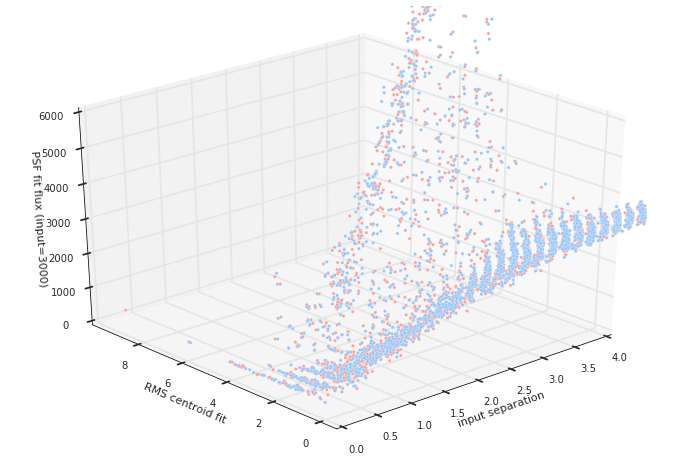

In [73]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

from ipywidgets import interact
interact(plot_3d, elev=(0,90), azim=(-180,180));